<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [93]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (2).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We do this because we want to avoid overfitting the model which will yield great results on our trainingset but will be of no practical use

In [94]:
# Show dataset
# split data into training and test datasets
# will implement the sklearn method here instead of manually splitting just need to ensure is 50/50 before linear model
trainingSet = df[0:284]
testSet = df[285:570]
xDiagnosis = trainingSet['Diagnosis']
yDiagnnosis = testSet['Diagnosis']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)
X = trainingSet
y = testSet


ValueError: ignored

In [95]:
trainingSet.head()


,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
testSet.head()


,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
285,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,0.2719,1.350,1.721,22.45,0.006383,0.008008,0.00186,0.002924,0.02571,0.002015,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
286,8912909,B,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.037910,0.1588,0.06766,0.2742,1.390,3.198,21.91,0.006719,0.051560,0.04387,0.016330,0.01872,0.008015,13.24,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.115500,0.2465,0.09981
287,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.013450,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.053660,0.2309,0.06915
288,8913049,B,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.055880,0.2595,0.06233,0.4866,1.905,2.877,34.68,0.015740,0.082620,0.08099,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.10280,0.18430,0.154600,0.093140,0.2955,0.07009
289,89143601,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,0.2656,1.974,1.954,17.49,0.006538,0.013950,0.01376,0.009924,0.03416,0.002928,12.36,26.14,79.29,459.3,0.11180,0.09708,0.075290,0.062030,0.3267,0.06994


In [97]:
X_train.values

array([[ 1.     , 16.74   , 21.59   , ...,  0.1813 ,  0.4863 ,  0.08633],
       [ 1.     , 15.3    , 25.27   , ...,  0.2024 ,  0.4027 ,  0.09876],
       [ 0.     , 11.43   , 17.31   , ...,  0.06402,  0.2584 ,  0.08096],
       ...,
       [ 0.     , 11.64   , 18.33   , ...,  0.1218 ,  0.2806 ,  0.09097],
       [ 0.     , 14.29   , 16.82   , ...,  0.03333,  0.2458 ,  0.0612 ],
       [ 0.     , 12.18   , 20.52   , ...,  0.07431,  0.2694 ,  0.06878]])

In [98]:
X_test.values

array([[ 1.     , 12.46   , 24.04   , ...,  0.221  ,  0.4366 ,  0.2075 ],
       [ 1.     , 17.3    , 17.08   , ...,  0.1857 ,  0.3138 ,  0.08113],
       [ 0.     , 16.84   , 19.46   , ...,  0.08436,  0.2527 ,  0.05972],
       ...,
       [ 1.     , 18.46   , 18.52   , ...,  0.1642 ,  0.3695 ,  0.08579],
       [ 0.     , 12.47   , 18.6    , ...,  0.1015 ,  0.3014 ,  0.0875 ],
       [ 1.     , 19.17   , 24.8    , ...,  0.1767 ,  0.3176 ,  0.1023 ]])

In [99]:
# print test set shape will be same as training set
print('test set shape: ',testSet.shape)
print('trainingset shape: ', trainingSet.shape)

test set shape:  (284, 32)
trainingset shape:  (284, 32)


In [100]:
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})
X_train['Diagnosis'] = X_train['Diagnosis'].replace({'M':1,'B':0})
y_train['Diagnosis'] = y_train['Diagnosis'].replace({'M':1,'B':0})
X_test['Diagnosis'] = X_test['Diagnosis'].replace({'M':1,'B':0})
y_test['Diagnosis'] = y_test['Diagnosis'].replace({'M':1,'B':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

## Show standard deviation of diagnose between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.

In [101]:
print('Standard deviation of diagnosis values in training set ',trainingSet['Diagnosis'].std())
print('Variance of diagnosis values in training set: ', trainingSet['Diagnosis'].var())

Standard deviation of diagnosis values in training set  0.5007708187683025
Variance of diagnosis values in training set:  0.25077141292987615


In [102]:
print('Standard deviation of diagnosis values in testing set ',testSet['Diagnosis'].std())
print('Variance of diagnosis values in testing set: ', testSet['Diagnosis'].var())

Standard deviation of diagnosis values in testing set  0.42531909439377436
Variance of diagnosis values in testing set:  0.18089633205594033


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.

In [103]:
# Show correlation of our training set
trainingSet.corr(method='pearson')

,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
ID,1.000000,0.013710,0.023517,0.159795,0.022735,0.027729,0.006836,0.021982,0.041477,0.005841,0.055459,-0.003330,0.022353,0.064557,0.032873,0.026500,0.255367,0.118989,0.119863,0.171629,0.053914,0.115996,0.001848,0.091921,0.003659,0.006726,-0.003382,0.018689,0.027298,-0.002951,-0.016891,0.020004
Diagnosis,0.013710,1.000000,0.703347,0.485373,0.715981,0.667035,0.314811,0.574862,0.622877,0.732545,0.299413,-0.010482,0.503082,-0.044788,0.495760,0.503786,-0.097301,0.279346,0.163661,0.343616,-0.034470,0.047932,0.757582,0.510923,0.765564,0.705765,0.411572,0.586005,0.614477,0.782921,0.418117,0.337542
Mean_Radius,0.023517,0.703347,1.000000,0.416415,0.997408,0.987866,0.093480,0.480938,0.626426,0.796443,0.137387,-0.321167,0.677440,-0.046538,0.673772,0.747920,-0.167242,0.210850,0.134393,0.328699,-0.063816,-0.045723,0.960578,0.358192,0.956904,0.936635,0.060297,0.374555,0.465421,0.705700,0.125492,-0.014133
Mean_Texture,0.159795,0.485373,0.416415,1.000000,0.421372,0.400284,-0.009081,0.290253,0.319960,0.341718,0.057195,-0.074200,0.253619,0.270159,0.259921,0.259671,-0.090914,0.193028,0.101520,0.145774,-0.074104,0.029167,0.452690,0.909996,0.453423,0.437695,0.122798,0.343081,0.334205,0.365272,0.134964,0.169448
Mean_Perimeter,0.022735,0.715981,0.997408,0.421372,1.000000,0.986137,0.136422,0.537753,0.670760,0.829846,0.177127,-0.265202,0.691965,-0.031106,0.695369,0.758219,-0.145823,0.259057,0.167170,0.361056,-0.035995,-0.007175,0.960076,0.363902,0.962581,0.935908,0.094588,0.419872,0.504426,0.735387,0.154109,0.031018
Mean_Area,0.027729,0.667035,0.987866,0.400284,0.986137,1.000000,0.100207,0.466542,0.632035,0.790454,0.127187,-0.296071,0.718999,-0.016383,0.714238,0.800204,-0.113326,0.214851,0.152767,0.320326,-0.030732,-0.021158,0.946216,0.335767,0.942642,0.943687,0.060027,0.343284,0.447492,0.674052,0.094772,-0.023343
Mean_Smoothness,0.006836,0.314811,0.093480,-0.009081,0.136422,0.100207,1.000000,0.641173,0.530556,0.548984,0.571420,0.602346,0.284035,0.093769,0.276355,0.231075,0.344493,0.366973,0.234304,0.329912,0.247269,0.308592,0.141084,0.039981,0.172760,0.133187,0.767162,0.476596,0.427929,0.473086,0.403487,0.503533
Mean_Compactness,0.021982,0.574862,0.480938,0.290253,0.537753,0.466542,0.641173,1.000000,0.882018,0.837872,0.622507,0.579548,0.499131,0.108756,0.547029,0.461093,0.134379,0.751579,0.502106,0.595981,0.295615,0.496100,0.515626,0.293007,0.574312,0.485344,0.531429,0.859178,0.796732,0.806720,0.536742,0.671440
Mean_Concavity,0.041477,0.622877,0.626426,0.319960,0.670760,0.632035,0.530556,0.882018,1.000000,0.906113,0.525676,0.400586,0.623912,0.141810,0.637533,0.607942,0.152112,0.697272,0.675275,0.662712,0.253480,0.493711,0.634134,0.301477,0.677017,0.618428,0.434185,0.723672,0.863081,0.828948,0.416502,0.513884
Mean_Concave_Points,0.005841,0.732545,0.796443,0.341718,0.829846,0.790454,0.548984,0.837872,0.906113,1.000000,0.488583,0.197440,0.692004,0.060270,0.701631,0.694567,0.063849,0.508674,0.378952,0.571547,0.147161,0.264812,0.801603,0.315289,0.831994,0.777381,0.431098,0.653413,0.717161,0.894042,0.373838,0.363538


# Training the linear regression model

Here we are using linear regression to train the model to predict the diagnosis of breast cancer based on featurese in the trainingset as we can see here the model is accurately predicting the diagnosis of trainingset values, it has an r squared value of 1 which tells us that the fit is ideal for the training set.  This model also has a mean squared error of ~4.5 which tells us that the model is fairly accurate when predicting values in the trainingset

In [104]:
# Here we train a model to perform linear regression data set to predict the diagnosis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
testArray = np.array(X_test.Diagnosis)
testArray = testArray.reshape(2,71)
trainArray = np.array(X_train.Diagnosis)
trainArray = trainArray.reshape(2,71)
# create the linear regression model by fitting training set to the test set
regression_model = LinearRegression().fit(trainArray, testArray)
# Score the model and retrive r^2 value
rSquared = regression_model.score(trainArray, testArray)
prediction = regression_model.predict(testArray)
print('r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(testArray, prediction))
print('Prediction: ', regression_model.predict(testArray))

r^2 value:  1.0
mean_squared_error value:  0.09463751608930375
Prediction:  [[0.56410256 1.         0.         0.         0.56410256 0.43589744
  0.56410256 0.         1.         0.43589744 0.         0.
  0.         0.56410256 0.56410256 0.43589744 0.56410256 0.
  0.         1.         0.         0.         0.43589744 0.56410256
  0.56410256 0.43589744 1.         0.43589744 1.         1.
  0.         0.         1.         1.         0.         0.
  0.         1.         0.43589744 0.56410256 0.56410256 1.
  0.56410256 0.56410256 0.56410256 0.56410256 0.         0.
  0.         1.         1.         0.43589744 0.43589744 1.
  0.56410256 0.56410256 1.         0.43589744 1.         1.
  0.         0.         0.         0.         0.56410256 0.
  1.         1.         0.43589744 0.         1.        ]
 [0.53846154 1.         0.         0.         0.53846154 0.46153846
  0.53846154 0.         1.         0.46153846 0.         0.
  0.         0.53846154 0.53846154 0.46153846 0.53846154 0.
  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Below we perform our predictions on the testset as you can see it also ideali fitted based on the r squared value and has a very low mean squared error

In [105]:
# here we need to reshape the data using numpy so that the training data matches the testdata
testArray = np.array(y_test.Diagnosis)
testArray = testArray.reshape(2,71)
trainArray = np.array(y_train.Diagnosis)
trainArray = trainArray.reshape(2,71)
regression_model = LinearRegression().fit(trainArray, testArray)

prediction = regression_model.predict(testArray)
print('r^2 value: ', regression_model.score(trainArray, testArray))
print('mean_squared_error value: ', mean_squared_error(testArray, prediction))
print('Prediction: ', regression_model.predict(np.abs(testArray)))


r^2 value:  1.0
mean_squared_error value:  0.11903075256271356
Prediction:  [[0.         0.         0.5        0.         0.         1.
  0.         0.         0.         0.         0.         0.5
  0.5        0.         0.         0.         0.         0.
  0.         0.5        0.5        0.         0.5        1.
  0.5        0.         0.         0.         0.         0.5
  0.5        0.         0.5        0.5        0.         0.
  1.         0.         0.         0.         0.         0.
  0.5        0.5        0.5        0.5        0.5        0.5
  0.         0.         0.5        0.5        0.         0.
  0.         0.         0.5        0.         0.5        0.5
  0.5        0.         0.5        0.         0.         0.
  0.5        0.5        0.5        0.5        0.5       ]
 [0.         0.         0.42307692 0.         0.         1.
  0.         0.         0.         0.         0.         0.42307692
  0.42307692 0.         0.         0.         0.         0.
  0.         0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [106]:
print(y_test.head())

     Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
294          0       12.720  ...          0.2369                  0.06922
538          0        7.729  ...          0.3058                  0.09938
442          0       13.780  ...          0.1859                  0.06810
494          0       13.160  ...          0.2687                  0.07429
360          0       12.540  ...          0.2233                  0.05521

[5 rows x 31 columns]


r^2 value:  1.0
mean_squared_error value:  7.031219341500106
Prediction training set:  [[11.84555714 11.41352779 19.64151587 12.48320842 12.18621314 20.50410235
  11.21013847 12.48541711 11.65399067 11.10918052 12.62906636 12.83240936
  16.25524145 14.68657921 14.49877823 11.12289174 12.5549461  10.97084274
  13.48454763 14.34193544 14.69533422 11.55013756 12.96629173 18.93218973
  15.18153787 13.97357703 12.58244354 13.08779222  9.86314693 19.04074997
  13.12934326 11.7062605  15.28419502 14.19875365 12.65216062 12.20236164
  19.47907347 12.57765077 13.59776872 11.60966    12.30683235 10.9871048
  16.34471586 14.3637395  13.2309101  15.59851894 12.86077424 14.80822604
  13.59239141 10.07541462 13.52104239 16.08288083 12.13985109 13.53760255
  11.12493672  8.38414833 16.90407305  8.55563159 18.26017675 17.29189119
  14.16675239 12.29932943 14.97193926 10.96737089 13.04223755 12.20247359
  15.66272248 14.44949373 14.22931404 14.7497563  11.697677  ]
 [12.02277011 10.65556159 18.49019563

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


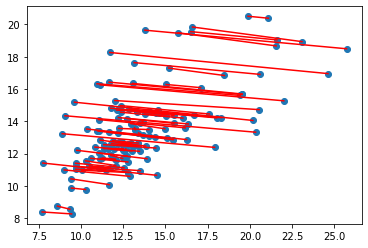

In [121]:
# We can also train the model to predict values in the test set with a high degree of accuracy as shown below
# In this example I have chosen to predict the mean radius of the test set based on the values in the trainingset
testArray = np.array(y_test.Mean_Radius)
testArray = testArray.reshape(2,71)
trainArray = np.array(y_train.Mean_Radius)
trainArray = trainArray.reshape(2,71)
regression_model = LinearRegression().fit(trainArray, testArray)
rSquared = regression_model.score(trainArray, testArray)
prediction = regression_model.predict(testArray)
print('r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(testArray, prediction))
print('Prediction training set: ', regression_model.predict(testArray))
plt.scatter(testArray,prediction)
plt.plot(testArray,prediction, color='Red')

In [119]:
y_test.head()

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
294,0,12.720,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,0.1638,0.06100,0.1807,0.6931,1.340,13.38,0.006064,0.011800,0.006564,0.007978,0.01374,0.001392,13.500,17.48,88.54,553.7,0.12980,0.14720,0.052330,0.06343,0.2369,0.06922
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.14,0.012660,0.009692,0.000000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.000000,0.00000,0.3058,0.09938
442,0,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.235,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.270,17.50,97.90,706.6,0.10720,0.10710,0.035170,0.03312,0.1859,0.06810
494,0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.020520,0.013410,0.005564,0.02086,0.002701,14.500,28.46,95.29,648.3,0.11180,0.16460,0.076980,0.04195,0.2687,0.07429
360,0,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,0.3511,0.9527,2.329,28.30,0.005783,0.004693,0.000793,0.003617,0.02043,0.001058,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521


In [112]:
testArray

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1]])

# Examples of low and high correlation in our dataset

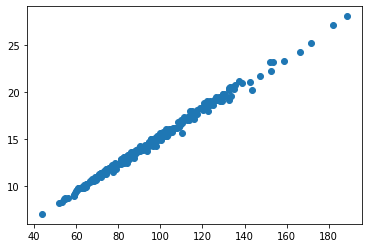

In [ ]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])


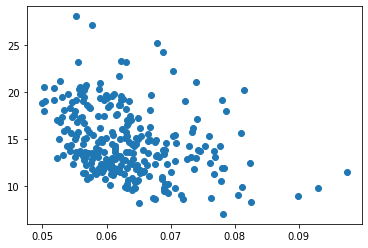

In [ ]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])


# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.84 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [ ]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(trainingSet,testSet[['Diagnosis']])
print(knn.score(trainingSet,testSet['Diagnosis']))

0.823943661971831


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [ ]:
testSet.shape


(284, 31)

In [ ]:
# Make prediction on testSet
knn.predict(testSet)

# maybe define list of features and use for loop to iterated

# Taken from line 336 in dataset should be labelled as benign
print(knn.predict([[-1,12.3,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,0.184,1.532,1.199,13.24,0.007881,0.008432,0.007004,0.006522,0.01939,0.002222,13.35,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207]]))
# Taken from line 402 of dataset should be malignant
print(knn.predict([[-1,17.91,21.02,124.4,994,0.123,0.2576,0.3189,0.1198,0.2113,0.07115,0.403,0.7747,3.123,41.51,0.007159,0.03718,0.06165,0.01051,0.01591,0.005099,20.8,27.78,149.6,1304,0.1873,0.5917,0.9034,0.1964,0.3245,0.1198]]))
# Taken from line 491 of dataset should be malignant
print(knn.predict([[-1,16.69,20.2,107.1,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.01446,0.01423,0.005297,0.01961,0.0017,19.18,26.56,127.3,1084,0.1009,0.292,0.2477,0.08737,0.4677,0.07623]]))
 # Taken from line 511 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.1183,32.52,0.009538]]))
# Taken from line 518 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.1068,67.36,0.006176]]))
# Line 470 should be malignant
print(naive_bayes.predict([[0.09289,104.9,0.006766]]))
# 324 Should be beningn
print(naive_bayes.predict([[0.1134,16.57,0.00591]]))

[0]
[0]
[0]
[0]
[1]
[1]
[0]


# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I choose the features used to train this model by randomly selecting features with low correlations, in Naive Bayes the weights of the features have no bearing on the output.  It was very interesting to see that the model is predicting accurately given the small number of trainingset features included in the model

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(trainingSet[['Mean_Smoothness','Area_SE','Smoothness_SE']],trainingSet[['Diagnosis']])
diagnosisPrediction = naive_bayes.predict(trainingSet[['Diagnosis']])
print(diagnosisPrediction)
print("Number of mislabeled points out of a total %d points : %d"
 % (trainingSet.shape[0], (trainingSet['Diagnosis'] != diagnosisPrediction).sum()))
print('Score of the model: ',naive_bayes.score(trainingSet[['Mean_Smoothness','Area_SE','Smoothness_SE']],trainingSet[['Diagnosis']]))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1]
Number of mislabeled points out of a total 284 points : 0
Score of the model:  0.8133802816901409


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
diagnosisPrediction = naive_bayes.predict(testSet[['Diagnosis']])
print("Number of mislabeled points out of a total %d points : %d"
 % (testSet.shape[0], (testSet['Diagnosis'] != diagnosisPrediction).sum()))


Number of mislabeled points out of a total 284 points : 0


Let's make some predictions based on features from randomly selected rows

In [ ]:
# maybe define list of features and use for loop to iterated and randomize


# Taken from line 336 in dataset should be labelled as benign
print(naive_bayes.predict([[0.08313,13.24,0.007881]]))
 # Taken from line 511 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.1183,32.52,0.009538]]))
# Taken from line 518 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.1068,67.36,0.006176]]))
# Line 470 should be malignant
print(naive_bayes.predict([[0.09289,104.9,0.006766]]))
# 324 Should be beningn
print(naive_bayes.predict([[0.1134,16.57,0.00591]]))


[0]
[0]
[1]
[1]
[0]


As we see above the model performs very well, not 100% perfect but good enough for classification as it predicted 4/5 or 80% of the diagnosis values for the given row
Judiging by the Naive Bayes score we achieved which was around 81% this is to be expected

In [ ]:

# We drop these as seen above all of these correlate well with the mean_radius in both sets
# removing these seems to reduce the mean squared error

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)

# Score the model and retrive r^2 value
# Notice that both our rsquared and mean squared error values decrease after dropping these columns from dataframe
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))

r^2 value:  1.0
mean squared errors value:  13.339169290650567


In [41]:
y_test.head()

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
294,0,12.720,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,0.1638,0.06100,0.1807,0.6931,1.340,13.38,0.006064,0.011800,0.006564,0.007978,0.01374,0.001392,13.500,17.48,88.54,553.7,0.12980,0.14720,0.052330,0.06343,0.2369,0.06922
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.14,0.012660,0.009692,0.000000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.000000,0.00000,0.3058,0.09938
442,0,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.235,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.270,17.50,97.90,706.6,0.10720,0.10710,0.035170,0.03312,0.1859,0.06810
494,0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.020520,0.013410,0.005564,0.02086,0.002701,14.500,28.46,95.29,648.3,0.11180,0.16460,0.076980,0.04195,0.2687,0.07429
360,0,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,0.3511,0.9527,2.329,28.30,0.005783,0.004693,0.000793,0.003617,0.02043,0.001058,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
